# CS207 Final Project Presentation - Group 4

## Library installation

It's super easy to install our library. Just one-line pip command:
```bash
pip install pychemkin

```

If you want to run tests, do the following:
```bash

git clone https://github.com/cs207group4/cs207-FinalProject.git

cd cs207-FinalProject

python setup.py test

```

## Basic Requirements

The basic requirements are implemented same as in milestone 1 and 2. Except that we are using a bigger NASA database now. The following example uses an xml file containing irreversible reactions, reversible reactions and new NASA species.

Our `chemkin` class can handle three different types of reaction coefficients, irreversible reactions and reversible reactions with species specified in NASA database.

In [1]:
import numpy as np
from pychemkin import chemkin, ChemSolver, ChemViz, simpleIO
rxnsystem = chemkin('demo_xml/demo.xml')

print(rxnsystem.summary())

Finished reading xml input file
chemical equations:
[
H + O2 [=] O + OH
O + H2 [=] H + OH
H2 + OH [=] H2O + H
O + H2O [=] OH + OH
HO2 + H [=] H2 + O2
HO2 + H [=] OH + OH
HO2 + O [=] O2 + OH
HO2 + OH [=] H2O + O2
H2O2 + H [=] H2O + OH
H2O2 + H [=] HO2 + H2
H2O2 + O [=] OH + HO2
]
species: ['H', 'O', 'OH', 'H2', 'H2O', 'O2', 'HO2', 'H2O2']
reversible: [ True  True  True  True  True  True  True  True  True  True  True]


In [2]:
T = 1500 #temperature in K
x = np.ones(8)
print("Progress rates")
print(rxnsystem.progress_rate(x,T))
print("Reaction rates")
print(rxnsystem.reaction_rate(x,T))

Progress rates
[ -7.38714255e+14   1.23527805e+12   9.96158478e+12  -7.75669761e+13
   1.55398791e+13   6.91350963e+13   3.24999993e+13   3.00749937e+13
   1.75292917e+13   2.54452663e+13   1.56107935e+13]
Reaction rates
[  6.22261584e+14  -7.10493349e+14  -7.28739230e+14   2.97882825e+13
   1.35132846e+14   8.16829127e+14  -1.06193909e+14  -5.85853515e+13]


## Chemkin Solver

We implemented a `ChemSolver` class that ...(insert presentation scripts here...)

In [3]:
# Solve an ODE
x_init = np.ones(8)
T = 1000

# integration end time
t_max = 5.e-13

# step size
dt = 1.e-16

cs = ChemSolver(chemkin('demo_xml/rxns_reversible.xml')).solve(x_init, T, t_max, dt)

Finished reading xml input file


In [4]:
# what's the result like - returns (time, concentration, reaction_rate)
cs.get_results()

(array([  0.00000000e+00,   1.00000000e-16,   2.00000000e-16, ...,
          4.99700000e-13,   4.99800000e-13,   4.99900000e-13]),
 array([[  1.00000000e+00,   1.40388889e+00,   1.55609804e+00, ...,
           6.09750660e-01,   6.09796468e-01,   6.09842274e-01],
        [  1.00000000e+00,   5.99803862e-01,   4.36896442e-01, ...,
           1.76166676e-01,   1.76175623e-01,   1.76184570e-01],
        [  1.00000000e+00,   5.59552587e-01,   3.96471743e-01, ...,
           4.10495501e-02,   4.10501341e-02,   4.10507181e-02],
        ..., 
        [  1.00000000e+00,   1.42459887e+00,   1.59903351e+00, ...,
           2.99842617e+00,   2.99839404e+00,   2.99836191e+00],
        [  1.00000000e+00,   9.87753069e-01,   9.75570303e-01, ...,
           1.41006350e-05,   1.40704615e-05,   1.40403503e-05],
        [  1.00000000e+00,   9.95405296e-01,   9.90154609e-01, ...,
           4.15874322e-05,   4.14983010e-05,   4.14093541e-05]]),
 array([[  7.18613864e+15,   2.24054331e+15,   1.01980211e+15

In [5]:
# result as a dataframe
df = cs.to_df()
df.head()

,t,H-Concentration,O-Concentration,OH-Concentration,H2-Concentration,H2O-Concentration,O2-Concentration,HO2-Concentration,H2O2-Concentration,H-Reaction_rate,O-Reaction_rate,OH-Reaction_rate,H2-Reaction_rate,H2O-Reaction_rate,O2-Reaction_rate,HO2-Reaction_rate,H2O2-Reaction_rate,T
0,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.186139e+15,-6.966219e+15,-7.885319e+15,2.922808e+13,4.208046e+14,7.376855e+15,-1.220904e+14,-3.939752e+13,1000.0
1,1.000000e-16,1.403889,0.599804,0.559553,1.003868,1.025129,1.424599,0.987753,0.995405,2.240543e+15,-2.307251e+15,-2.419883e+15,4.487272e+13,1.563024e+14,2.458111e+15,-1.223802e+14,-5.031498e+13,1000.0
2,2.000000e-16,1.556098,0.436896,0.396472,1.008660,1.037115,1.599034,0.975570,0.990155,1.019802e+15,-1.154405e+15,-1.080408e+15,5.018722e+13,9.483374e+13,1.245287e+15,-1.211582e+14,-5.413915e+13,1000.0
3,3.000000e-16,1.631130,0.347005,0.317808,1.013810,1.045306,1.696758,0.963536,0.984647,5.435176e+14,-7.024104e+14,-5.618140e+14,5.250687e+13,7.217554e+13,7.713060e+14,-1.194947e+14,-5.578688e+13,1000.0
4,4.000000e-16,1.672628,0.289049,0.275509,1.019121,1.051945,1.761044,0.951677,0.979028,3.108598e+14,-4.796844e+14,-3.109858e+14,5.356416e+13,6.182231e+13,5.385785e+14,-1.176621e+14,-5.649240e+13,1000.0


In [6]:
# Is equilibrium reached at the end time of the reaction?
cs.is_equilibrium()

False

In [7]:
# save solved result as a csv file or an HDF5 file
cs.save_results('result.csv')
cs.save_results('result.h5')

In [8]:
# Grid search for parameters
cs.grid_search([np.ones(8)], [500,1000,1500], t_max, dt).get_grid_results()

([[500, 1000, 1500], [array([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])]],
 {500: [(array([  0.00000000e+00,   1.00000000e-16,   2.00000000e-16, ...,
             4.99700000e-13,   4.99800000e-13,   4.99900000e-13]),
    array([[  1.00000000e+00,   1.97569189e+00,   1.97642053e+00, ...,
              5.50129451e-01,   5.50125218e-01,   5.50120988e-01],
           [  1.00000000e+00,   2.09619791e-02,   1.86456412e-03, ...,
              3.44213064e-03,   3.44326958e-03,   3.44440864e-03],
           [  1.00000000e+00,   2.15827791e-03,   9.59913960e-03, ...,
              4.48003716e-04,   4.47851467e-04,   4.47699307e-04],
           ..., 
           [  1.00000000e+00,   1.99725409e+00,   2.01928736e+00, ...,
              3.22105419e+00,   3.22105544e+00,   3.22105669e+00],
           [  1.00000000e+00,   9.85717691e-01,   9.71676478e-01, ...,
              4.29900566e-04,   4.29512639e-04,   4.29125065e-04],
           [  1.00000000e+00,   9.96777006e-01,   9.93550028e-01, ...,
       

In [9]:
# load from file -- csv or hdf5. Useful when solving ODE takes long time
cs = ChemSolver(chemkin('demo_xml/rxns_reversible.xml')).load_results('result.csv')
cs.to_df().head()

Finished reading xml input file


,t,H-Concentration,O-Concentration,OH-Concentration,H2-Concentration,H2O-Concentration,O2-Concentration,HO2-Concentration,H2O2-Concentration,H-Reaction_rate,O-Reaction_rate,OH-Reaction_rate,H2-Reaction_rate,H2O-Reaction_rate,O2-Reaction_rate,HO2-Reaction_rate,H2O2-Reaction_rate,T
0,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.186139e+15,-6.966219e+15,-7.885319e+15,2.922808e+13,4.208046e+14,7.376855e+15,-1.220904e+14,-3.939752e+13,1000.0
1,1.000000e-16,1.403889,0.599804,0.559553,1.003868,1.025129,1.424599,0.987753,0.995405,2.240543e+15,-2.307251e+15,-2.419883e+15,4.487272e+13,1.563024e+14,2.458111e+15,-1.223802e+14,-5.031498e+13,1000.0
2,2.000000e-16,1.556098,0.436896,0.396472,1.008660,1.037115,1.599034,0.975570,0.990155,1.019802e+15,-1.154405e+15,-1.080408e+15,5.018722e+13,9.483374e+13,1.245287e+15,-1.211582e+14,-5.413915e+13,1000.0
3,3.000000e-16,1.631130,0.347005,0.317808,1.013810,1.045306,1.696758,0.963536,0.984647,5.435176e+14,-7.024104e+14,-5.618140e+14,5.250687e+13,7.217554e+13,7.713060e+14,-1.194947e+14,-5.578688e+13,1000.0
4,4.000000e-16,1.672628,0.289049,0.275509,1.019121,1.051945,1.761044,0.951677,0.979028,3.108598e+14,-4.796844e+14,-3.109858e+14,5.356416e+13,6.182231e+13,5.385785e+14,-1.176621e+14,-5.649240e+13,1000.0


## Chemkin Solver Visualization

We implemented a `ChemViz` class which is built on a solved `ChemSolver` object...(insert presentation scripts here...)

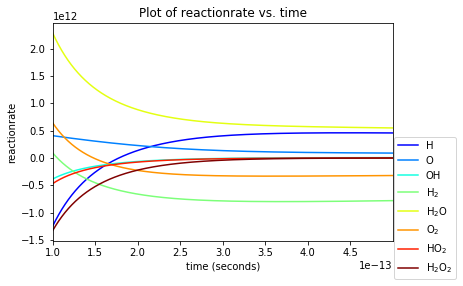

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
cv = ChemViz(cs)
cv.plot_time_series("reactionrate",tmin=1e-13)

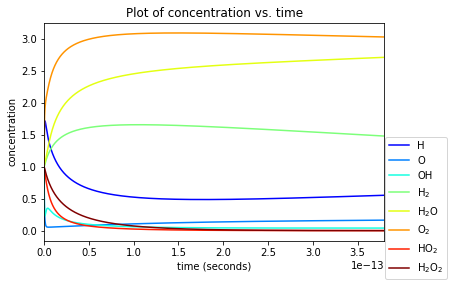

In [11]:
cv.plot_time_series("concentration",tmax=3.8e-13)

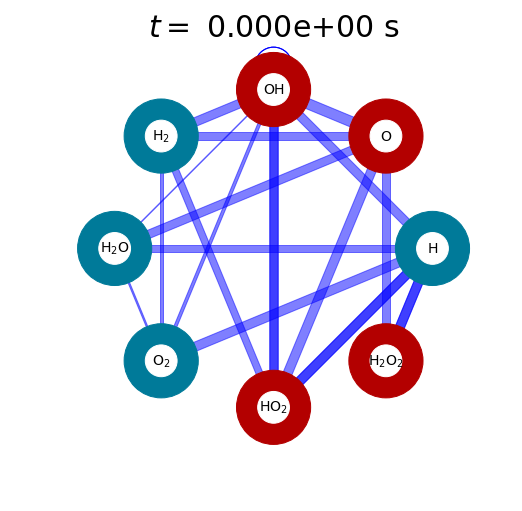

In [12]:
cv.plot_network([0])

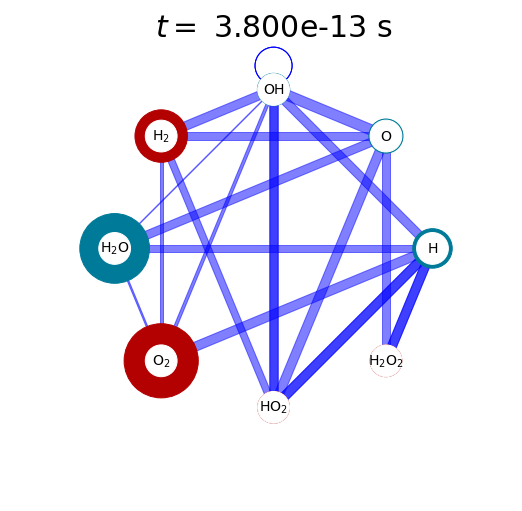

In [13]:
cv.plot_network([3.8e-13])

In [14]:
cv.html_report('report.html')

After running the above code, an HTML report will be generated as [report.html](report.html)

## simpleIO

We implemented a `simpleIO` class which can save and load objects...(insert presentation scripts here...)

In [15]:
#save the ChemSolver object
simpleIO('cs.pkl').to_pickle(cs)
cs2 = simpleIO('cs.pkl').read_pickle()
cs2.to_df().head()

,t,H-Concentration,O-Concentration,OH-Concentration,H2-Concentration,H2O-Concentration,O2-Concentration,HO2-Concentration,H2O2-Concentration,H-Reaction_rate,O-Reaction_rate,OH-Reaction_rate,H2-Reaction_rate,H2O-Reaction_rate,O2-Reaction_rate,HO2-Reaction_rate,H2O2-Reaction_rate,T
0,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.186139e+15,-6.966219e+15,-7.885319e+15,2.922808e+13,4.208046e+14,7.376855e+15,-1.220904e+14,-3.939752e+13,1000.0
1,1.000000e-16,1.403889,0.599804,0.559553,1.003868,1.025129,1.424599,0.987753,0.995405,2.240543e+15,-2.307251e+15,-2.419883e+15,4.487272e+13,1.563024e+14,2.458111e+15,-1.223802e+14,-5.031498e+13,1000.0
2,2.000000e-16,1.556098,0.436896,0.396472,1.008660,1.037115,1.599034,0.975570,0.990155,1.019802e+15,-1.154405e+15,-1.080408e+15,5.018722e+13,9.483374e+13,1.245287e+15,-1.211582e+14,-5.413915e+13,1000.0
3,3.000000e-16,1.631130,0.347005,0.317808,1.013810,1.045306,1.696758,0.963536,0.984647,5.435176e+14,-7.024104e+14,-5.618140e+14,5.250687e+13,7.217554e+13,7.713060e+14,-1.194947e+14,-5.578688e+13,1000.0
4,4.000000e-16,1.672628,0.289049,0.275509,1.019121,1.051945,1.761044,0.951677,0.979028,3.108598e+14,-4.796844e+14,-3.109858e+14,5.356416e+13,6.182231e+13,5.385785e+14,-1.176621e+14,-5.649240e+13,1000.0


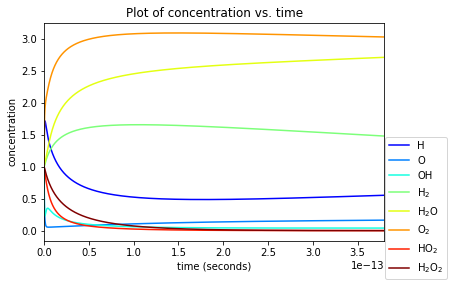

In [16]:
#save the ChemViz object
simpleIO('cv.pkl').to_pickle(cv)
cv2 = simpleIO('cv.pkl').read_pickle()
cv2.plot_time_series("concentration",tmax=3.8e-13)